# Multiclass classification on MNIST data using SVM

In [1]:
#python >=3.5 is required
import sys
assert sys.version_info >= (3,5)

#scikit-learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#common imports
import numpy as np
import os
import pandas as pd

#to make this notebook's output stable across runs
np.random.seed(42)

#to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#saving figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png",resolution=200):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi = resolution)

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [5]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X = mnist.data
y = mnist.target

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

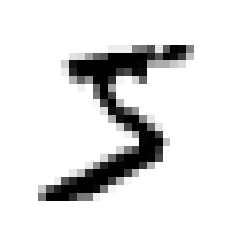

In [10]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_X,test_X,train_y,test_y = train_test_split(X,y, random_state=42, test_size=0.2, shuffle=False)

In [13]:
train_X.shape

(56000, 784)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
train_X_scaled = scaler.fit_transform(train_X)

In [17]:
from sklearn.svm import SVC, LinearSVC

In [40]:
lin_svm = LinearSVC(random_state=42)

In [41]:
lin_svm.fit(train_X_scaled, train_y)

/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [42]:
lin_svm.predict([some_digit])

array(['3'], dtype=object)

In [27]:
from sklearn.metrics import accuracy_score

In [54]:
pred_y = lin_svm.predict(train_X_scaled)

In [55]:
accuracy_score(pred_y,train_y)

0.9198214285714286

In [22]:
svm_clf = SVC(random_state=42)

In [48]:
svm_clf.fit(train_X_scaled, train_y)

SVC(random_state=42)

In [49]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [50]:
pred_y = svm_clf.predict(train_X)

In [51]:
accuracy_score(pred_y,train_y)

0.9898392857142857

# hyper parameter tuning

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
from scipy.stats import reciprocal, uniform

In [23]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(train_X_scaled[:1000], train_y[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   0.2s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   0.2s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   0.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   0.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   0.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   0.2s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.1s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.1s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.1s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   0.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   0.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVC(random_state=42),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcf7f12f4f0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcf7f12ee30>},
                   verbose=2)

In [24]:
rnd_search_cv.best_estimator_

SVC(C=2.560186404424365, gamma=0.002051110418843397, random_state=42)

In [25]:
rnd_search_cv.best_estimator_.fit(train_X_scaled, train_y)

SVC(C=2.560186404424365, gamma=0.002051110418843397, random_state=42)

In [26]:
pred_y = rnd_search_cv.best_estimator_.predict(train_X_scaled)

In [28]:
accuracy_score(pred_y,train_y)

0.9974107142857143

In [29]:
rnd_search_cv.best_estimator_.predict(scaler.fit_transform(test_X))

array(['1', '8', '5', ..., '4', '5', '6'], dtype=object)

In [31]:
test_pred_y = _

In [32]:
accuracy_score(test_pred_y,test_y)

0.9705714285714285